In [215]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
pd.options.display.max_columns = None # Shows all columns
import numpy as np
import json
import dill 
from IPython.display import display
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
# ========================================
# READ/EXTRACT RELEVANT DATA
# ========================================
with open("data/Kickstarter_2018-10-18T03_20_48_880Z/Kickstarter_2018-10-18T03_20_48_880Z.json",
          encoding="utf8") as json_file:
    json_obj = [json.loads(line) for line in json_file]

In [217]:
# ---- QUICK EXPLORATION ----

In [218]:
type(json_obj)

list

In [219]:
len(json_obj)

205696

In [220]:
type(json_obj[0])

dict

In [221]:
len(json_obj[0])

4

In [222]:
json_obj[len(json_obj)-1] # look at final entry

{'table_id': 'Kickstarter',
 'robot_id': 'Kickstarter',
 'run_id': 'Kickstarter_2018-10-18T03_20_48_880Z',
 'data': {'id': 1991284368,
  'photo': {'key': 'assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png',
   'full': 'https://ksr-ugc.imgix.net/assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463696010&auto=format&frame=1&q=92&s=02368a096ce01fc6cae29ab85df52d53',
   'ed': 'https://ksr-ugc.imgix.net/assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463696010&auto=format&frame=1&q=92&s=7c87714e96670269be821591da0ddbb1',
   'med': 'https://ksr-ugc.imgix.net/assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png?ixlib=rb-1.1.0&crop=faces&w=272&h=153&fit=crop&v=1463696010&auto=format&frame=1&q=92&s=7ce6128059b609c7603ab19d113e7c55',
   'little': 'https://ksr-ugc.imgix.net/assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png?i

In [223]:
json_obj[0].keys()

dict_keys(['table_id', 'robot_id', 'run_id', 'data'])

In [ ]:
# The useful keys are 'data'

In [224]:
# Extract relevant data
# pre-allocate
json_obj2 = []
# append 'data' dictionary only
for x in range(0, len(json_obj)):
    json_obj2.append(json_obj[x]["data"])

In [225]:
len(json_obj2) - len(json_obj) # Check that all rows extracted

0

In [226]:
json_obj2[0]

{'id': 895922629,
 'photo': {'key': 'assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg',
  'full': 'https://ksr-ugc.imgix.net/assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463713991&auto=format&frame=1&q=92&s=846b5db7dd4a36491881770969721fab',
  'ed': 'https://ksr-ugc.imgix.net/assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463713991&auto=format&frame=1&q=92&s=c2d76a75d1cd815488d3d3b651b49222',
  'med': 'https://ksr-ugc.imgix.net/assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg?ixlib=rb-1.1.0&crop=faces&w=272&h=153&fit=crop&v=1463713991&auto=format&frame=1&q=92&s=f938afb8f27ea25f81b3f57bc8349d88',
  'little': 'https://ksr-ugc.imgix.net/assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg?ixlib=rb-1.1.0&crop=faces&w=208&h=117&fit=crop&v=1463713991&auto=format&frame=1&q=92&s=69632b0cf7a30977d7eb58a05f3bd315',
 

In [227]:
# ---- EXTRACT RELEVANT COLUMNS ----
json_obj2[0].keys()

dict_keys(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug', 'disable_communication', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type', 'creator', 'location', 'category', 'profile', 'spotlight', 'urls', 'source_url'])

In [228]:
# Remove probably useless keys as well as nested-dictionary keys (to be added back later if desired): 
#   - Useless: photo, slug, urls, source_url
#   - Nested: creator, location, category, profile (to maybe be added later)
keys=('id', 'name', 'blurb', 'goal', 'pledged', 'state', 'disable_communication', 'country', 'currency', 'currency_symbol',
      'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable',
      'backers_count', 'static_usd_rate', 'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type',
      'spotlight')

# pre-allocate
json_obj3 = []
# Append
for x in range(0, len(json_obj2)):
    json_obj3.append({k:json_obj2[x][k] for k in keys})

In [229]:
# ==== ADD BACK USEFUL SUB-DICTIONARY VALUES ====
# Previously removed: 'creator', 'location', 'category', 'profile'

In [230]:
# ---- Explore 'creator' ----

In [231]:
# Grab useful previously removed sub key-value pairs:
json_obj2[0]["creator"].keys()

dict_keys(['id', 'name', 'slug', 'is_registered', 'chosen_currency', 'avatar', 'urls'])

In [232]:
json_obj2[0]["creator"]

{'id': 69089661,
 'name': 'AJ Smith and Brandon Maier (deleted)',
 'slug': 'joziijobs',
 'is_registered': True,
 'chosen_currency': None,
 'avatar': {'thumb': 'https://ksr-ugc.imgix.net/missing_user_avatar.png?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=&auto=format&frame=1&q=92&s=c8baefb239621e7b5b26957577e078db',
  'small': 'https://ksr-ugc.imgix.net/missing_user_avatar.png?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=&auto=format&frame=1&q=92&s=fea4448b425bb704dead957d7448b9cc',
  'medium': 'https://ksr-ugc.imgix.net/missing_user_avatar.png?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=&auto=format&frame=1&q=92&s=fea4448b425bb704dead957d7448b9cc'},
 'urls': {'web': {'user': 'https://www.kickstarter.com/profile/joziijobs'},
  'api': {'user': 'https://api.kickstarter.com/v1/users/69089661?signature=1539920420.2da0e34dfcb087a277252ace8e292e04f47e953d'}}}

In [233]:
# Useful keys are: 'is_registered'

In [234]:
# Add 'is_registered' to json_obj3
for x in range(0, len(json_obj3)):
    json_obj3[x]["creator_registered"] = json_obj2[x]["creator"]["is_registered"]

In [235]:
# ---- Explore 'location' ----

In [236]:
json_obj2[0]["location"].keys()

dict_keys(['id', 'name', 'slug', 'short_name', 'displayable_name', 'localized_name', 'country', 'state', 'type', 'is_root', 'urls'])

In [237]:
json_obj2[0]["location"]

{'id': 12589342,
 'name': 'Manhattan',
 'slug': 'manhattan-ny',
 'short_name': 'Manhattan, NY',
 'displayable_name': 'Manhattan, NY',
 'localized_name': 'Manhattan',
 'country': 'US',
 'state': 'NY',
 'type': 'County',
 'is_root': False,
 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/manhattan-ny',
   'location': 'https://www.kickstarter.com/locations/manhattan-ny'},
  'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1539904398.aae3553d1e62a16aac55da44ac8c71966f64bb86&woe_id=12589342'}}}

In [238]:
# Useful keys: country, state

In [239]:
for x in range(0, len(json_obj3)):
    # Extract country and state data
    if "location" in json_obj2[x]:
        json_obj3[x]["loc_country"] = json_obj2[x]["location"]["country"]
        json_obj3[x]["loc_state"] = json_obj2[x]["location"]["state"]
    
    # Add None when country/state data does not exist
    else:
        json_obj3[x]["loc_country"] = np.float64('nan')
        json_obj3[x]["loc_state"] = np.float64('nan')

In [240]:
# ---- Explore 'category' ----

In [241]:
# Grab useful previously removed sub key-value pairs:
json_obj2[0]["category"].keys()

dict_keys(['id', 'name', 'slug', 'position', 'parent_id', 'color', 'urls'])

In [242]:
json_obj2[0]["category"]

{'id': 342,
 'name': 'Web',
 'slug': 'technology/web',
 'position': 15,
 'parent_id': 16,
 'color': 6526716,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/technology/web'}}}

In [243]:
# Useful keys: name, slug, position, parent_id

In [244]:
# Check for null entries
x_category = 0
for x in range(0, len(json_obj2)):
    if "category" in json_obj2[x]:
        x_category = x_category + 1
    else:
        break
x_category - len(json_obj2)

0

In [245]:
json_obj2[0]["category"]

{'id': 342,
 'name': 'Web',
 'slug': 'technology/web',
 'position': 15,
 'parent_id': 16,
 'color': 6526716,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/technology/web'}}}

In [246]:
x_name = 0
for x in range(0, len(json_obj2)):
    if "name" in json_obj2[x]["category"]:
        x_name = x_name + 1
x_name - len(json_obj2)

0

In [247]:
x_slug = 0
for x in range(0, len(json_obj2)):
    if "slug" in json_obj2[x]["category"]:
        x_slug = x_slug + 1
x_slug - len(json_obj2)

0

In [248]:
x_position = 0
for x in range(0, len(json_obj2)):
    if "position" in json_obj2[x]["category"]:
        x_position = x_position + 1
x_position - len(json_obj2)

0

In [249]:
x_parent_id = 0
for x in range(0, len(json_obj2)):
    if "parent_id" in json_obj2[x]["category"]:
        x_parent_id = x_parent_id + 1
x_parent_id - len(json_obj2)

-17378

In [250]:
# NOTE: parent_id has 17378 null values!

In [251]:
for x in range(0, len(json_obj3)):
    # Extract name, slug, position, and parent_id data
    json_obj3[x]["category_name"] = json_obj2[x]["category"]["name"]
    json_obj3[x]["category_slug"] = json_obj2[x]["category"]["slug"]
    json_obj3[x]["category_position"] = json_obj2[x]["category"]["position"]
    if "parent_id" in json_obj2[x]["category"]:
        json_obj3[x]["category_parent_id"] = json_obj2[x]["category"]["parent_id"]
        
    # Add NaN when data does not exist
    else:
        json_obj3[x]["category_parent_id"] = np.float64('nan')

In [252]:
# ---- Explore 'profile' ----

In [253]:
# Grab useful previously removed sub key-value pairs:
json_obj2[0]["profile"].keys()

dict_keys(['id', 'project_id', 'state', 'state_changed_at', 'name', 'blurb', 'background_color', 'text_color', 'link_background_color', 'link_text_color', 'link_text', 'link_url', 'show_feature_image', 'background_image_opacity', 'should_show_feature_image_section', 'feature_image_attributes'])

In [254]:
json_obj2[56037]["profile"]

{'id': 1841891,
 'project_id': 1841891,
 'state': 'inactive',
 'state_changed_at': 1429068314,
 'name': None,
 'blurb': None,
 'background_color': None,
 'text_color': None,
 'link_background_color': None,
 'link_text_color': None,
 'link_text': None,
 'link_url': None,
 'show_feature_image': False,
 'background_image_opacity': 0.8,
 'should_show_feature_image_section': True,
 'feature_image_attributes': {'image_urls': {'default': 'https://ksr-ugc.imgix.net/assets/012/107/897/fa251d5986d6744d80e917ce8402ae0b_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463737460&auto=format&frame=1&q=92&s=3417203c5d3a4e034ffc31fa89c1c892',
   'baseball_card': 'https://ksr-ugc.imgix.net/assets/012/107/897/fa251d5986d6744d80e917ce8402ae0b_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463737460&auto=format&frame=1&q=92&s=ddce863a58a3fae73b17d0e6610a85a2'}}}

In [255]:
json_obj2[4]["profile"]["state"]

'active'

In [256]:
# check to see how many profile states are 'inactive'
x_inactive = 0
for x in range(0, len(json_obj2)):
    if json_obj2[x]["profile"]["state"] == 'inactive':
        x_inactive += 1
x_inactive

181513

In [257]:
# check to see how many profile states are 'active'
x_active = 0
for x in range(0, len(json_obj2)):
    if json_obj2[x]["profile"]["state"] == 'active':
        x_active += 1
x_active

24183

In [258]:
len(json_obj2) - x_active - x_inactive

0

In [259]:
# There are only two options for state: active and inactive - there are many inactive profile states

In [260]:
# Useful keys: none
# This is a bit of a guess. Most of the profile states are labeled as 'inactive'.
# My guess is that the profiles go latent once a projct is finished (perhaps regardless of whether it was successful or not)

In [261]:
# ---- CONVERT TO DATA FRAME ----

In [262]:
json_obj3[0]

{'id': 895922629,
 'name': 'Jozii-College Jobs Made Easy',
 'blurb': 'Jozii is the premier service for full-time university students to find paid part-time work and internships.',
 'goal': 3500,
 'pledged': 50,
 'state': 'failed',
 'disable_communication': False,
 'country': 'US',
 'currency': 'USD',
 'currency_symbol': '$',
 'currency_trailing_code': True,
 'deadline': 1417150740,
 'state_changed_at': 1417150742,
 'created_at': 1413476386,
 'launched_at': 1414525374,
 'staff_pick': False,
 'is_starrable': False,
 'backers_count': 1,
 'static_usd_rate': 1,
 'usd_pledged': '50.0',
 'converted_pledged_amount': 50,
 'fx_rate': 1,
 'current_currency': 'USD',
 'usd_type': 'international',
 'spotlight': False,
 'creator_registered': True,
 'loc_country': 'US',
 'loc_state': 'NY',
 'category_name': 'Web',
 'category_slug': 'technology/web',
 'category_position': 15,
 'category_parent_id': 16}

In [263]:
len(json_obj3)

205696

In [264]:
# Create initial (dirty) dataframe (for future reference)
df00 = pd.DataFrame.from_records(json_obj3)

In [ ]:
df00.to_csv("data/df00.csv", sep=",")

In [265]:
# Create working dataframe
df = pd.DataFrame.from_records(json_obj3)
df.head()

,backers_count,blurb,category_name,category_parent_id,category_position,category_slug,converted_pledged_amount,country,created_at,creator_registered,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,loc_country,loc_state,name,pledged,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type
0,1,Jozii is the premier service for full-time uni...,Web,16.0,15,technology/web,50,US,1413476386,True,USD,$,True,USD,1417150740,False,1.000000,3500.0,895922629,False,1414525374,US,NY,Jozii-College Jobs Made Easy,50.00,False,False,failed,1417150742,1.000000,50.0,international
1,63,Dropsy is an adventure game with a focus on ex...,Video Games,12.0,7,games/video games,1613,US,1317217452,True,USD,$,True,USD,1320259151,False,1.000000,225.0,1190376005,False,1318876751,US,FL,DROPSY: A different take on the old school adv...,1613.47,True,True,successful,1320259153,1.000000,1613.47,international
2,113,We've bought a press and already found a studi...,Letterpress,18.0,7,publishing/letterpress,6633,US,1403324529,True,USD,$,True,USD,1410502338,False,1.000000,6500.0,672906219,False,1407910338,US,OR,Letra Chueca / Crooked Letter: a printshop & b...,6633.00,True,False,successful,1410502338,1.000000,6633.0,international
3,1,"Premium, fashion sneaker brand intertwining hi...",Footwear,9.0,5,fashion/footwear,1,GB,1457103832,True,GBP,£,False,USD,1462305856,False,1.317483,15000.0,2121203785,False,1457125456,GB,England,High End Premium Handmade Sneakers,1.00,False,False,failed,1462305856,1.407899,1.40789944,international
4,99,Made in Europe from the finest quality leather...,Footwear,9.0,5,fashion/footwear,20654,CA,1423776567,True,CAD,$,True,USD,1429678898,False,0.771892,15000.0,434454655,False,1426654898,CA,ON,The Domenico Sneakerboot by Luigi Sardo Shoes,25338.00,True,False,successful,1429678899,0.782122,19817.40571572,international


In [266]:
df.tail()

,backers_count,blurb,category_name,category_parent_id,category_position,category_slug,converted_pledged_amount,country,created_at,creator_registered,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,loc_country,loc_state,name,pledged,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type
205691,66,Re: Magazine is the Savannah College of Art an...,Periodicals,18.0,10,publishing/periodicals,4846,US,1329261163,True,USD,$,True,USD,1330664340,False,1.00000,3000.0,1159353017,False,1329268057,US,GA,Re: Magazine,4846.79,True,True,successful,1330664342,1.000000,4846.79,international
205692,113,"Due to popularity, demand, and based on feedba...",Events,3.0,3,comics/events,8596,GB,1389612547,True,GBP,£,False,USD,1396700229,False,1.30995,5000.0,1803588311,False,1393679829,GB,England,Melksham Comic Con 2014 - The Expansion!,5186.50,True,False,successful,1396700229,1.668265,8652.45860083,international
205693,259,An epic and timeless hand illustrated deck of ...,Playing Cards,12.0,4,games/playing cards,7623,US,1409509864,True,USD,$,True,USD,1412891098,False,1.00000,6000.0,1043689512,False,1410299098,US,FL,A Deck of Skeletons. Vintage Playing Cards.,7623.00,True,False,successful,1412891110,1.000000,7623.0,international
205694,2,The slasher film has returned.,Horror,11.0,10,film & video/horror,80,US,1475388732,True,USD,$,True,USD,1477985542,False,1.00000,50000.0,1830832546,False,1475393542,US,OH,I'm Scared - Inde Film,80.00,False,False,failed,1477985542,1.000000,80.0,international
205695,3,We are opening what we hope will be a wonderfu...,Restaurants,10.0,9,food/restaurants,35,US,1405914894,True,USD,$,True,USD,1408057020,False,1.00000,3000.0,1991284368,False,1406739106,US,TX,Get Hula Cowgirl Shaved Ice Over the Last Bump!,35.00,False,False,failed,1408057020,1.000000,35.0,international


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205696 entries, 0 to 205695
Data columns (total 32 columns):
backers_count               205696 non-null int64
blurb                       205696 non-null object
category_name               205696 non-null object
category_parent_id          188318 non-null float64
category_position           205696 non-null int64
category_slug               205696 non-null object
converted_pledged_amount    205696 non-null int64
country                     205696 non-null object
created_at                  205696 non-null int64
creator_registered          205696 non-null bool
currency                    205696 non-null object
currency_symbol             205696 non-null object
currency_trailing_code      205696 non-null bool
current_currency            205696 non-null object
deadline                    205696 non-null int64
disable_communication       205696 non-null bool
fx_rate                     205696 non-null float64
goal                        205

In [268]:
df.describe()

,backers_count,category_parent_id,category_position,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate
count,205696.000000,188318.000000,205696.000000,2.056960e+05,2.056960e+05,2.056960e+05,205696.000000,2.056960e+05,2.056960e+05,2.056960e+05,2.056960e+05,2.056960e+05,205696.000000
mean,146.106132,11.782331,7.137514,1.223341e+04,1.412305e+09,1.418814e+09,1.003671,4.513457e+04,1.074607e+09,1.415885e+09,1.373092e+04,1.418616e+09,1.017976
std,1033.317310,5.540618,4.575614,9.256958e+04,7.025463e+07,7.041752e+07,0.197427,1.141468e+06,6.190907e+08,7.056412e+07,1.346135e+05,7.018238e+07,0.201805
min,0.000000,1.000000,1.000000,0.000000e+00,1.240335e+09,1.241334e+09,0.008886,1.000000e-02,1.852000e+04,1.240603e+09,0.000000e+00,1.241334e+09,0.008771
25%,4.000000,10.000000,3.000000,1.100000e+02,1.358319e+09,1.365907e+09,1.000000,1.500000e+03,5.379528e+08,1.363131e+09,1.100000e+02,1.365890e+09,1.000000
50%,27.000000,12.000000,6.000000,1.558000e+03,1.415725e+09,1.423431e+09,1.000000,5.000000e+03,1.077976e+09,1.420672e+09,1.560320e+03,1.423275e+09,1.000000
75%,85.000000,16.000000,10.000000,6.220000e+03,1.463547e+09,1.470328e+09,1.000000,1.340000e+04,1.608983e+09,1.467530e+09,6.300000e+03,1.470191e+09,1.000000
max,105857.000000,26.000000,19.000000,1.026684e+07,1.539821e+09,1.545013e+09,10.268501,1.000000e+08,2.147476e+09,1.539838e+09,2.334387e+07,1.539839e+09,1.716408


In [269]:
# ========================================
# CLEAN DATA
# ========================================

In [270]:
# ---- REARRANGE COLUMNS ----
df.columns

Index(['backers_count', 'blurb', 'category_name', 'category_parent_id',
       'category_position', 'category_slug', 'converted_pledged_amount',
       'country', 'created_at', 'creator_registered', 'currency',
       'currency_symbol', 'currency_trailing_code', 'current_currency',
       'deadline', 'disable_communication', 'fx_rate', 'goal', 'id',
       'is_starrable', 'launched_at', 'loc_country', 'loc_state', 'name',
       'pledged', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type'],
      dtype='object')

In [271]:
json_obj3[0].keys()

dict_keys(['id', 'name', 'blurb', 'goal', 'pledged', 'state', 'disable_communication', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type', 'spotlight', 'creator_registered', 'loc_country', 'loc_state', 'category_name', 'category_slug', 'category_position', 'category_parent_id'])

In [272]:
# The df keys got rearranged into alphabetical order.

In [273]:
# Re-order columns
df = df[['id', 'name', 'blurb', 'category_name', 'category_slug', 'category_position', 'category_parent_id', 'goal', 'pledged', 
         'disable_communication', 'loc_country', 'loc_state', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 
         'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable', 'backers_count', 'static_usd_rate', 
         'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type', 'spotlight', 
         'creator_registered', 'state']]

In [274]:
len(df.columns)

32

In [275]:
# ---- REMOVE DUPLICATES ----

In [276]:
df.sort_values(by=["backers_count"],ascending=False)[["id","name","backers_count"]]

,id,name,backers_count
69279,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",105857
188496,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",105857
150213,1755266685,The Veronica Mars Movie Project,91585
13732,1929840910,Double Fine Adventure,87142
53281,1929840910,Double Fine Adventure,87142
129025,286165030,Torment: Tides of Numenera,74405
136791,286165030,Torment: Tides of Numenera,74405
186022,458565935,Project Eternity,73986
141451,458565935,Project Eternity,73986
174366,1194278206,Yooka-Laylee - A 3D Platformer Rare-vival!,73206


In [277]:
df.drop_duplicates(inplace=True)

In [278]:
df.shape

(189240, 32)

In [279]:
# We dropped 205696-189240=16456 duplicate rows

In [280]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-2166

In [281]:
# There are still 2166 duplicate IDs

In [282]:
# Explore the duplicate ID rows
#pd.concat(g for _, g in df.groupby("id") if len(g) > 1)

,id,name,blurb,category_name,category_slug,category_position,category_parent_id,goal,pledged,disable_communication,loc_country,loc_state,country,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,static_usd_rate,usd_pledged,converted_pledged_amount,fx_rate,current_currency,usd_type,spotlight,creator_registered,state
10531,422207,The Arduino Compatible Educational Sensor Lear...,This arduino / Raspberry Pi compatible board s...,Hardware,technology/hardware,8,16.0,1200.0,7728.00,False,CA,ON,CA,CAD,$,True,1393108430,1393108430,1389567799,1390516430,False,False,180,0.911649,7045.22602224,6951,0.771892,USD,international,True,True,successful
69099,422207,The Arduino Compatible Educational Sensor Lear...,This arduino / Raspberry Pi compatible board s...,Hardware,technology/hardware,8,16.0,1200.0,7728.00,False,CA,ON,CA,CAD,$,True,1393108430,1393108430,1389567799,1390516430,False,False,180,0.911649,7045.22602224,6951,0.766650,USD,international,True,True,successful
184333,1033120,Fields of Fire: Miniatures rules for modern co...,"With this simple, yet realistic rules compilat...",Tabletop Games,games/tabletop games,6,12.0,2500.0,2575.00,False,US,OH,US,USD,$,True,1366070400,1366070432,1346080396,1363996884,False,False,35,1.000000,2575.0,2575,1.000000,USD,international,True,True,successful
204054,1033120,Fields of Fire: Miniatures rules for modern co...,"With this simple, yet realistic rules compilat...",Tabletop Games,games/tabletop games,6,12.0,2500.0,2575.00,False,US,OH,US,USD,$,True,1366070400,1366070432,1346080396,1363996884,False,False,35,1.000000,2575.0,3358,1.304376,CAD,None,True,True,successful
83960,2705005,"LOVE MEI waterproof case, protect iPhone X/Xs ...","This IP68 Waterproof Case for iPhone X/Xs, wit...",Gadgets,technology/gadgets,7,16.0,24000.0,1110.00,False,CN,Guangdong,HK,HKD,$,True,1540434973,1537842973,1534754716,1537842973,False,True,11,0.128052,142.1373093,141,0.127570,USD,international,False,True,live
203854,2705005,"LOVE MEI waterproof case, protect iPhone X/Xs ...","This IP68 Waterproof Case for iPhone X/Xs, wit...",Gadgets,technology/gadgets,7,16.0,24000.0,1110.00,False,CN,Guangdong,HK,HKD,$,True,1540434973,1537842973,1534754716,1537842973,False,True,11,0.128006,142.0867266,141,0.127570,USD,international,False,True,live
67679,4534946,'Skin Walkers' knit FMP,I'm a third year student currently designing &...,Couture,fashion/couture,4,9.0,50.0,85.00,False,GB,England,GB,GBP,£,False,1403715600,1403715612,1399672863,1401094797,False,False,6,1.683130,143.06609165,144,1.317483,USD,international,True,True,successful
160239,4534946,'Skin Walkers' knit FMP,I'm a third year student currently designing &...,Couture,fashion/couture,4,9.0,50.0,85.00,False,GB,England,GB,GBP,£,False,1403715600,1403715612,1399672863,1401094797,False,False,6,1.683130,143.06609165,145,1.708667,CAD,None,True,True,successful
84917,5090855,Charmed Flying Broom,A spooky horror Halloween old school 3D platfo...,Video Games,games/video games,7,12.0,250000.0,418.80,False,US,CA,MX,MXN,$,True,1541014320,1539641701,1539372742,1539641701,False,True,2,0.053033,22.210417236,22,0.052969,USD,domestic,False,True,live
105652,5090855,Charmed Flying Broom,A spooky horror Halloween old school 3D platfo...,Video Games,games/video games,7,12.0,250000.0,418.80,False,US,CA,MX,MXN,$,True,1541014320,1539641701,1539372742,1539641701,False,True,2,0.053033,22.210417236,33,0.080902,NZD,None,False,True,live


In [283]:
# It looks like some of the rows look different due to usd_pledged, converted_pledged_amount, fx_rate (which appears to be 
# exchange rate), and current_currency. Let's just delete the following currency-related columns:
# currency_symbol, static_usd_rate, convertd_pledged_amount, fx_rate, current_currency, usd_type
df.drop(columns=['currency_symbol','static_usd_rate','converted_pledged_amount','fx_rate','current_currency','usd_type'], 
        inplace=True)

In [284]:
df.shape

(189240, 26)

In [285]:
df.drop_duplicates(inplace=True)

In [286]:
df.shape

(187367, 26)

In [287]:
# We dropped 189240-187367=1873 duplicate rows

In [288]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-293

In [289]:
# There are still 293 duplicate ID rows

In [290]:
pd.options.display.max_columns = None

In [291]:
df.loc[[171904,205007]]

,id,name,blurb,category_name,category_slug,category_position,category_parent_id,goal,pledged,disable_communication,loc_country,loc_state,country,currency,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,usd_pledged,spotlight,creator_registered,state
171904,8412272,The ultimate music performance machine for stu...,Pipes is a new audio platform which out-horsep...,Hardware,technology/hardware,8,16.0,100000.0,106609.0,False,US,CA,US,USD,True,1542234085,1539638486,1537803552,1539638485,True,True,243,106609.0,False,True,live
205007,8412272,The ultimate music performance machine for stu...,Pipes is a new audio platform which out-horsep...,Hardware,technology/hardware,8,16.0,100000.0,107407.0,False,US,CA,US,USD,True,1542234085,1539638486,1537803552,1539638485,True,True,245,107407.0,False,True,live


In [292]:
# It looks like there are differences with pledged, backers_count and usd_pledged

In [293]:
# usd_pledged is redundant with pledged - remove usd_pledged
df.drop(columns=['usd_pledged'], inplace=True)

In [294]:
df.shape

(187367, 25)

In [295]:
df.drop_duplicates(inplace=True)

In [296]:
df.shape

(187345, 25)

In [297]:
# we dropped 187367-187345=22 duplicate rows

In [298]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-271

In [299]:
# There are still 271 duplicates

In [300]:
# is_starrable is unclear and seems to be a problem with duplicates. Let's drop it
df.drop(columns=['is_starrable'], inplace=True)

In [301]:
df.shape

(187345, 24)

In [302]:
df.drop_duplicates(inplace=True)

In [303]:
df.shape

(187344, 24)

In [304]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-270

In [305]:
# There are still 270 duplicates

In [306]:
df.loc[[171904,205007]]

,id,name,blurb,category_name,category_slug,category_position,category_parent_id,goal,pledged,disable_communication,loc_country,loc_state,country,currency,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,spotlight,creator_registered,state
171904,8412272,The ultimate music performance machine for stu...,Pipes is a new audio platform which out-horsep...,Hardware,technology/hardware,8,16.0,100000.0,106609.0,False,US,CA,US,USD,True,1542234085,1539638486,1537803552,1539638485,True,243,False,True,live
205007,8412272,The ultimate music performance machine for stu...,Pipes is a new audio platform which out-horsep...,Hardware,technology/hardware,8,16.0,100000.0,107407.0,False,US,CA,US,USD,True,1542234085,1539638486,1537803552,1539638485,True,245,False,True,live


In [307]:
# Still differences between pledged and backers_count. Without some sort of a time stamp we don't know which one is the most
# updated row. Let's look for duplicate IDs, then keep the rows with the largest pledge values

In [308]:
df = df.sort_values('pledged', ascending=False).drop_duplicates('id').sort_index()

In [309]:
df.loc[df["id"] == 8412272].pledged

205007    107407.0
Name: pledged, dtype: float64

In [310]:
# Looks like it worked! There is only one entry for ID 8412272 and it is the larger pledge of the two initial entries.

In [311]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

0

In [312]:
# No more duplicates!

In [313]:
df.shape

(187074, 24)

In [314]:
df.columns

Index(['id', 'name', 'blurb', 'category_name', 'category_slug',
       'category_position', 'category_parent_id', 'goal', 'pledged',
       'disable_communication', 'loc_country', 'loc_state', 'country',
       'currency', 'currency_trailing_code', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'staff_pick', 'backers_count', 'spotlight',
       'creator_registered', 'state'],
      dtype='object')

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187074 entries, 0 to 205695
Data columns (total 24 columns):
id                        187074 non-null int64
name                      187074 non-null object
blurb                     187074 non-null object
category_name             187074 non-null object
category_slug             187074 non-null object
category_position         187074 non-null int64
category_parent_id        169696 non-null float64
goal                      187074 non-null float64
pledged                   187074 non-null float64
disable_communication     187074 non-null bool
loc_country               186198 non-null object
loc_state                 186155 non-null object
country                   187074 non-null object
currency                  187074 non-null object
currency_trailing_code    187074 non-null bool
deadline                  187074 non-null int64
state_changed_at          187074 non-null int64
created_at                187074 non-null int64
launched_at  

In [316]:
# Re-index
df.reset_index(drop=True, inplace=True)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187074 entries, 0 to 187073
Data columns (total 24 columns):
id                        187074 non-null int64
name                      187074 non-null object
blurb                     187074 non-null object
category_name             187074 non-null object
category_slug             187074 non-null object
category_position         187074 non-null int64
category_parent_id        169696 non-null float64
goal                      187074 non-null float64
pledged                   187074 non-null float64
disable_communication     187074 non-null bool
loc_country               186198 non-null object
loc_state                 186155 non-null object
country                   187074 non-null object
currency                  187074 non-null object
currency_trailing_code    187074 non-null bool
deadline                  187074 non-null int64
state_changed_at          187074 non-null int64
created_at                187074 non-null int64
launched_at  

In [318]:
# ---- FURTHER REFINE VARIABLES ----

In [319]:
df.columns

Index(['id', 'name', 'blurb', 'category_name', 'category_slug',
       'category_position', 'category_parent_id', 'goal', 'pledged',
       'disable_communication', 'loc_country', 'loc_state', 'country',
       'currency', 'currency_trailing_code', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'staff_pick', 'backers_count', 'spotlight',
       'creator_registered', 'state'],
      dtype='object')

# variable notes

## delete
* name - delete
* blurb - delete
* loc_state - delete (too granular)
* country - delete (not sure how it differs from loc_country; largely redundant)
* currency - delete (pledges is in usd)
* currency_trailing_code - delete (what is it?)
* state_changed_at - delete

## keep
* id - keep (primary key)
* category_name - keep; change to sub_category
* category slug - keep; extract first word; change to category
* category_position - keep; change to sub_category_id; move before sub_category
* category_parent_id - keep; change to category_id; move before category
* goal - keep
* pledged - keep
* disable_communication - keep (but what is it??)
* loc_country - keep (where the project is launche from); rename as country
* deadline - keep; convert to datetime
* created_at - keep; convert to datetime
* launched_at - keep; convert to datetime
* staff_pick - keep
* backers_count - keep; move before pledged
* spotlight - keep (but what is it?)
* creator_registered - keep
* state - keep

In [320]:
df.drop(columns=['name','blurb','loc_state','country','currency','currency_trailing_code','state_changed_at'], inplace=True)

In [321]:
len(df.columns)

17

In [322]:
# Rename columns
df.rename(columns={'category_name':'sub_category', 'category_slug':'category', 'category_position':'sub_category_id', 
                  'category_parent_id':'category_id', 'loc_country':'country', 'state':'launch_state'}, inplace=True)

In [323]:
df.columns

Index(['id', 'sub_category', 'category', 'sub_category_id', 'category_id',
       'goal', 'pledged', 'disable_communication', 'country', 'deadline',
       'created_at', 'launched_at', 'staff_pick', 'backers_count', 'spotlight',
       'creator_registered', 'launch_state'],
      dtype='object')

In [324]:
# Re-arrange columns
df = df[['id', 'sub_category_id', 'sub_category', 'category_id', 'category', 'goal', 'backers_count', 'pledged', 
         'disable_communication', 'country','deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight', 
         'creator_registered', 'launch_state']]

In [325]:
df.columns

Index(['id', 'sub_category_id', 'sub_category', 'category_id', 'category',
       'goal', 'backers_count', 'pledged', 'disable_communication', 'country',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight',
       'creator_registered', 'launch_state'],
      dtype='object')

In [326]:
df.sort_values(by=['category_id','sub_category_id'])

,id,sub_category_id,sub_category,category_id,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_registered,launch_state
203,710268515,1,Ceramics,1.0,art/ceramics,2425.00,103,7550.00,False,US,1425855600,1424404478,1424460276,True,True,True,successful
221,367139629,1,Ceramics,1.0,art/ceramics,85.00,0,0.00,False,BE,1442427120,1439830504,1439835120,False,False,True,failed
237,2144529772,1,Ceramics,1.0,art/ceramics,20000.00,9,276.00,False,US,1452962031,1449592381,1450370031,False,False,True,failed
252,703029125,1,Ceramics,1.0,art/ceramics,4500.00,23,533.00,False,GB,1501579528,1495788869,1498987528,False,False,True,failed
456,1480803309,1,Ceramics,1.0,art/ceramics,10000.00,12,384.00,False,US,1541032247,1538439659,1538675280,False,False,True,live
481,1455271842,1,Ceramics,1.0,art/ceramics,15000.00,119,15299.00,False,US,1430981940,1423575259,1428320006,False,True,True,successful
519,1460620306,1,Ceramics,1.0,art/ceramics,700.00,8,345.00,False,US,1448156043,1443735046,1445560443,False,False,True,failed
627,995319524,1,Ceramics,1.0,art/ceramics,25000.00,215,26229.00,False,CA,1426120620,1422502366,1423532220,True,True,True,successful
649,2111622512,1,Ceramics,1.0,art/ceramics,30000.00,14,1775.00,False,US,1431759540,1426282073,1426612843,False,False,True,canceled
658,829968813,1,Ceramics,1.0,art/ceramics,3000.00,8,482.00,False,US,1413202144,1409803618,1410610144,False,False,True,failed


In [327]:
len(df.sub_category_id.unique())

19

In [328]:
len(df.sub_category.unique())

159

In [329]:
len(df.category_id.unique())

16

In [330]:
len(df.category.unique())

169

In [331]:
# The number of category IDs does not match the category titles (same for sub-).

In [332]:
df.sort_values(by='sub_category_id').sub_category_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [333]:
df[df.sub_category_id == 1].sub_category.unique()

array(['Audio', 'Animals', 'Candles', 'Bacon', 'Accessories', 'Art',
       'Ceramics', 'Performances', 'Gaming Hardware', '3D Printing',
       'Action', 'Comedy', 'Anthologies', 'Academic', 'Blues',
       'Architecture'], dtype=object)

In [334]:
df[df.sub_category_id == 2].sub_category.unique()

array(['Animation', 'Experimental', 'Comics', 'Comic Books',
       'Anthologies', 'Apps', 'Conceptual Art', 'Residencies', 'Crochet',
       'Photo', 'Fine Art', 'Apparel', 'Civic Design',
       'Community Gardens', 'Chiptune', 'Live Games'], dtype=object)

In [335]:
df[df.sub_category_id == 3].sub_category.unique()

array(['Spaces', 'Crafts', 'Camera Equipment', 'Comedy', 'Nature', 'DIY',
       'Art Books', 'Digital Art', 'Mobile Games', 'Childrenswear',
       'Classical Music', 'Festivals', 'Events', 'Cookbooks', 'Print',
       'Graphic Design'], dtype=object)

In [336]:
df[df.sub_category_id == 4].sub_category.unique()

array(['Embroidery', 'Playing Cards', 'Illustration', 'Calendars',
       'Graphic Novels', 'DIY Electronics', 'Couture', 'Video', 'Dance',
       'People', 'Immersive', 'Documentary', 'Drinks',
       'Interactive Design', 'Workshops', 'Comedy'], dtype=object)

In [337]:
df[df.sub_category_id == 5].sub_category.unique()

array(['Footwear', 'Webcomics', 'Photobooks', 'Musical',
       "Children's Books", 'Country & Folk', 'Puzzles',
       'Fabrication Tools', 'Glass', 'Product Design', 'Design',
       'Installations', 'Drama', 'Events', 'Web'], dtype=object)

In [338]:
# there does not seem to be a strong correlation between sub_category_id and sub_category. Let's drop the sub_category_id 
# and (maybe) keep sub_category

In [339]:
df.sort_values(by='category_id').category_id.unique()

array([ 1.,  3.,  6.,  7.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 26., nan])

In [340]:
df[df.category_id == 1].category.unique()

array(['art/painting', 'art/textiles', 'art/illustration',
       'art/mixed media', 'art/ceramics', 'art/sculpture',
       'art/digital art', 'art/conceptual art', 'art/public art',
       'art/performance art', 'art/installations', 'art/video art'],
      dtype=object)

In [341]:
df[df.category_id == 3].category.unique()

array(['comics/webcomics', 'comics/comic books', 'comics/graphic novels',
       'comics/events', 'comics/anthologies'], dtype=object)

In [342]:
df[df.category_id == 6].category.unique()

array(['dance/spaces', 'dance/performances', 'dance/residencies',
       'dance/workshops'], dtype=object)

In [343]:
df[df.category_id == 7].category.unique()

array(['design/product design', 'design/civic design',
       'design/interactive design', 'design/typography',
       'design/graphic design', 'design/architecture'], dtype=object)

In [344]:
df[df.category_id == 9].category.unique()

array(['fashion/footwear', 'fashion/accessories', 'fashion/ready-to-wear',
       'fashion/couture', 'fashion/childrenswear', 'fashion/pet fashion',
       'fashion/apparel', 'fashion/jewelry'], dtype=object)

In [345]:
df[df.category_id == 10].category.unique()

array(['food/bacon', 'food/vegan', 'food/restaurants', 'food/food trucks',
       'food/cookbooks', 'food/small batch', 'food/farms', 'food/events',
       'food/drinks', 'food/spaces', 'food/community gardens',
       "food/farmer's markets"], dtype=object)

In [346]:
df[df.category_id == 11].category.unique()

array(['film & video/animation', 'film & video/family',
       'film & video/comedy', 'film & video/horror',
       'film & video/fantasy', 'film & video/music videos',
       'film & video/narrative film', 'film & video/movie theaters',
       'film & video/action', 'film & video/romance',
       'film & video/webseries', 'film & video/shorts',
       'film & video/festivals', 'film & video/drama',
       'film & video/documentary', 'film & video/thrillers',
       'film & video/television', 'film & video/experimental',
       'film & video/science fiction'], dtype=object)

In [347]:
df[df.category_id == 12].category.unique()

array(['games/video games', 'games/playing cards', 'games/tabletop games',
       'games/mobile games', 'games/gaming hardware', 'games/puzzles',
       'games/live games'], dtype=object)

In [348]:
df[df.category_id == 13].category.unique()

array(['journalism/audio', 'journalism/video', 'journalism/photo',
       'journalism/print', 'journalism/web'], dtype=object)

In [349]:
df[df.category_id == 14].category.unique()

array(['music/jazz', 'music/electronic music', 'music/faith', 'music/pop',
       'music/metal', 'music/r&b', 'music/kids', 'music/hip-hop',
       'music/country & folk', 'music/rock', 'music/classical music',
       'music/indie rock', 'music/world music', 'music/latin',
       'music/punk', 'music/blues', 'music/comedy', 'music/chiptune'],
      dtype=object)

In [350]:
df[df.category_id == 15].category.unique()

array(['photography/photobooks', 'photography/animals',
       'photography/places', 'photography/nature', 'photography/fine art',
       'photography/people'], dtype=object)

In [351]:
df[df.category_id == 16].category.unique()

array(['technology/web', 'technology/hardware',
       'technology/camera equipment', 'technology/software',
       'technology/wearables', 'technology/makerspaces',
       'technology/sound', 'technology/robots', 'technology/apps',
       'technology/diy electronics', 'technology/gadgets',
       'technology/3d printing', 'technology/fabrication tools',
       'technology/space exploration', 'technology/flight'], dtype=object)

In [352]:
df[df.category_id == 17].category.unique()

array(['theater/experimental', 'theater/spaces', 'theater/musical',
       'theater/plays', 'theater/festivals', 'theater/comedy',
       'theater/immersive'], dtype=object)

In [353]:
df[df.category_id == 18].category.unique()

array(['publishing/letterpress', 'publishing/periodicals',
       'publishing/radio & podcasts', "publishing/children's books",
       'publishing/nonfiction', 'publishing/anthologies',
       'publishing/fiction', 'publishing/poetry', 'publishing/calendars',
       'publishing/art books', 'publishing/literary journals',
       'publishing/translations', 'publishing/literary spaces',
       'publishing/zines', 'publishing/academic',
       'publishing/young adult', 'publishing/comedy'], dtype=object)

In [354]:
df[df.category_id == 26].category.unique()

array(['crafts/woodworking', 'crafts/quilts', 'crafts/embroidery',
       'crafts/knitting', 'crafts/candles', 'crafts/diy',
       'crafts/stationery', 'crafts/crochet', 'crafts/pottery',
       'crafts/glass', 'crafts/weaving', 'crafts/printing',
       'crafts/taxidermy'], dtype=object)

In [355]:
df[np.isnan(df.category_id)].category.unique()

array(['theater', 'photography', 'crafts', 'comics', 'technology', 'art',
       'publishing', 'music', 'dance', 'fashion', 'design', 'games',
       'film & video', 'journalism', 'food'], dtype=object)

In [356]:
df.sort_values('sub_category').sub_category.unique()

array(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
       'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
       'Art', 'Art Books', 'Audio', 'Bacon', 'Blues', 'Calendars',
       'Camera Equipment', 'Candles', 'Ceramics', "Children's Books",
       'Childrenswear', 'Chiptune', 'Civic Design', 'Classical Music',
       'Comedy', 'Comic Books', 'Comics', 'Community Gardens',
       'Conceptual Art', 'Cookbooks', 'Country & Folk', 'Couture',
       'Crafts', 'Crochet', 'DIY', 'DIY Electronics', 'Dance', 'Design',
       'Digital Art', 'Documentary', 'Drama', 'Drinks',
       'Electronic Music', 'Embroidery', 'Events', 'Experimental',
       'Fabrication Tools', 'Faith', 'Family', 'Fantasy',
       "Farmer's Markets", 'Farms', 'Fashion', 'Festivals', 'Fiction',
       'Film & Video', 'Fine Art', 'Flight', 'Food', 'Food Trucks',
       'Footwear', 'Gadgets', 'Games', 'Gaming Hardware', 'Glass',
       'Graphic Design', 'Graphic Novels', 'Hardware', 'Hip-Ho

In [357]:
df.sort_values('category').category.unique()

array(['art', 'art/ceramics', 'art/conceptual art', 'art/digital art',
       'art/illustration', 'art/installations', 'art/mixed media',
       'art/painting', 'art/performance art', 'art/public art',
       'art/sculpture', 'art/textiles', 'art/video art', 'comics',
       'comics/anthologies', 'comics/comic books', 'comics/events',
       'comics/graphic novels', 'comics/webcomics', 'crafts',
       'crafts/candles', 'crafts/crochet', 'crafts/diy',
       'crafts/embroidery', 'crafts/glass', 'crafts/knitting',
       'crafts/pottery', 'crafts/printing', 'crafts/quilts',
       'crafts/stationery', 'crafts/taxidermy', 'crafts/weaving',
       'crafts/woodworking', 'dance', 'dance/performances',
       'dance/residencies', 'dance/spaces', 'dance/workshops', 'design',
       'design/architecture', 'design/civic design',
       'design/graphic design', 'design/interactive design',
       'design/product design', 'design/typography', 'fashion',
       'fashion/accessories', 'fashion/appa

# CATEGORY NOTES

So, what do we keep? It doesn't make much sense to keep sub-categories without the parent category. And for now, dealing with so many categories to begin with it might become overwhelming trying to manage sub-categories too. Let's start with just categories and see if we can make some good predictions (and remember that we can always beef up the algorithm later by adding in the sub-category variables).

As for the category variables, do we want to extract the parent category (eg 'technology') or do we want to keep the sub-categories tacked on (eg 'technology/3d printing' and 'technology/apps')? For now, as mentioned above, let's drop the sub-categories (eg 'technology/3d printing' and 'technology/apps' are both just considered 'technology'). 

We now have two choices: keep the category as categorical or use the IDs. For context, let's keep the categories as categorical and use dummy variables later as needed.

In [358]:
df.columns

Index(['id', 'sub_category_id', 'sub_category', 'category_id', 'category',
       'goal', 'backers_count', 'pledged', 'disable_communication', 'country',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight',
       'creator_registered', 'launch_state'],
      dtype='object')

In [359]:
df.drop(columns=['sub_category_id','sub_category','category_id'], inplace=True)

In [360]:
len(df.columns)

14

In [361]:
# Now let's extract the primary category from the category column
df.category[0]

'technology/web'

In [362]:
df.category[0].split('/')[0]

'technology'

In [363]:
df.category[24:28]

24         technology/web
25                theater
26            photography
27    technology/hardware
Name: category, dtype: object

In [364]:
[i.split('/')[0] for i in df.category][24:28]

['technology', 'theater', 'photography', 'technology']

In [365]:
df.category = [i.split('/')[0] for i in df.category]

In [366]:
df.sort_values(by='category').category.unique()

array(['art', 'comics', 'crafts', 'dance', 'design', 'fashion',
       'film & video', 'food', 'games', 'journalism', 'music',
       'photography', 'publishing', 'technology', 'theater'], dtype=object)

In [367]:
len(df.category.unique())

15

In [368]:
# We are left with 15 categories.
df.columns

Index(['id', 'category', 'goal', 'backers_count', 'pledged',
       'disable_communication', 'country', 'deadline', 'created_at',
       'launched_at', 'staff_pick', 'spotlight', 'creator_registered',
       'launch_state'],
      dtype='object')

In [369]:
df.head()

,id,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_registered,launch_state
0,895922629,technology,3500.0,1,50.00,False,US,1417150740,1413476386,1414525374,False,False,True,failed
1,1190376005,games,225.0,63,1613.47,False,US,1320259151,1317217452,1318876751,True,True,True,successful
2,672906219,publishing,6500.0,113,6633.00,False,US,1410502338,1403324529,1407910338,False,True,True,successful
3,2121203785,fashion,15000.0,1,1.00,False,GB,1462305856,1457103832,1457125456,False,False,True,failed
4,434454655,fashion,15000.0,99,25338.00,False,CA,1429678898,1423776567,1426654898,False,True,True,successful


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187074 entries, 0 to 187073
Data columns (total 14 columns):
id                       187074 non-null int64
category                 187074 non-null object
goal                     187074 non-null float64
backers_count            187074 non-null int64
pledged                  187074 non-null float64
disable_communication    187074 non-null bool
country                  186198 non-null object
deadline                 187074 non-null int64
created_at               187074 non-null int64
launched_at              187074 non-null int64
staff_pick               187074 non-null bool
spotlight                187074 non-null bool
creator_registered       187074 non-null bool
launch_state             187074 non-null object
dtypes: bool(4), float64(2), int64(5), object(3)
memory usage: 15.0+ MB


In [371]:
df.deadline[0]

1417150740

In [372]:
# Convert relevant values to datetime 
# The default format of these values is in unix time format
df['deadline'] = df['deadline'].apply(datetime.utcfromtimestamp)
df['created_at'] = df['created_at'].apply(datetime.utcfromtimestamp)
df['launched_at'] = df['launched_at'].apply(datetime.utcfromtimestamp)

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187074 entries, 0 to 187073
Data columns (total 14 columns):
id                       187074 non-null int64
category                 187074 non-null object
goal                     187074 non-null float64
backers_count            187074 non-null int64
pledged                  187074 non-null float64
disable_communication    187074 non-null bool
country                  186198 non-null object
deadline                 187074 non-null datetime64[ns]
created_at               187074 non-null datetime64[ns]
launched_at              187074 non-null datetime64[ns]
staff_pick               187074 non-null bool
spotlight                187074 non-null bool
creator_registered       187074 non-null bool
launch_state             187074 non-null object
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 15.0+ MB


In [374]:
df.head()

,id,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_registered,launch_state
0,895922629,technology,3500.0,1,50.00,False,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,True,failed
1,1190376005,games,225.0,63,1613.47,False,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,True,successful
2,672906219,publishing,6500.0,113,6633.00,False,US,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,True,successful
3,2121203785,fashion,15000.0,1,1.00,False,GB,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False,True,failed
4,434454655,fashion,15000.0,99,25338.00,False,CA,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True,True,successful


In [375]:
# ---- NA IMPUTATION ----

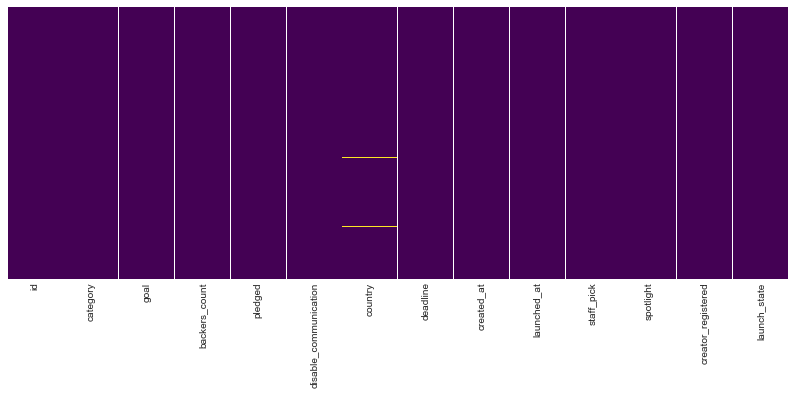

In [376]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [377]:
# So few null values that they don't even show up
df.isnull().sum(axis=0)

id                         0
category                   0
goal                       0
backers_count              0
pledged                    0
disable_communication      0
country                  876
deadline                   0
created_at                 0
launched_at                0
staff_pick                 0
spotlight                  0
creator_registered         0
launch_state               0
dtype: int64

In [378]:
# There are only 876 null values, all of which are in the 'country' column. 

In [379]:
# Retrieve list of project IDs that have country=NaN
df[df["country"].isnull().values]["id"].values

array([1775299895, 1651932198, 2017224179, 1986698316,  652547363,
        168259570,  209496650, 2101209122,  267001356, 1342774664,
        247222418, 1247565965,   99132453, 1306667681,  678771618,
       1879092971,   19191290, 1043186408, 1347000820, 1538128419,
        803839138,  850902006,  267799631,  174001393, 1187017384,
        328095435,  818187585, 2134618875, 2102499682, 1426770726,
       2121091524, 1537183488, 1801286262, 1268661446, 1431131694,
        571386977, 1811031638, 2109798222, 1649566181,  498132862,
        789689637, 1025576318,  881290817, 1434929160,  560265514,
       1560676808,  369394494,  123926393,  976511853,  539276195,
       1473103893, 1751661288,  852463791, 1943856807,  266044220,
          4948516, 1630449227, 1124319724, 1123095712,  655581038,
       2073434962, 1951610976,  137508291,  746191332,  363726356,
       1773676029,   52907321, 1705836248, 1387900367,  408538385,
        949216748, 1320750243, 1700059981,  695131245,  943559

In [380]:
df00[df00['id'].isin(df[df["country"].isnull().values]["id"].values)].sort_values(by='id').drop_duplicates('id')

,backers_count,blurb,category_name,category_parent_id,category_position,category_slug,converted_pledged_amount,country,created_at,creator_registered,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,loc_country,loc_state,name,pledged,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type
162949,25,This is a project to create a free iPhone app ...,Software,16.0,11,technology/software,145,US,1240637870,True,USD,$,True,USD,1247554799,False,1.0,99.00,727286,False,1240673781,NaN,NaN,Offline Wikipedia iPhone app,145.00,True,True,successful,1247554830,1.0,145.0,international
140467,90,Dream with Me--A documentary that will change ...,Documentary,11.0,4,film & video/documentary,5615,US,1252976897,True,USD,$,True,USD,1255655280,False,1.0,5000.00,2442649,False,1252986806,NaN,NaN,Dream with Me--A documentary about one year in...,5615.00,True,True,successful,1255655706,1.0,5615.0,international
185101,30,Three women fresh out of college explore outsi...,Art,NaN,1,art,1999,US,1273868958,True,USD,$,True,USD,1278625140,False,1.0,2000.00,4732285,False,1274912793,NaN,NaN,Insiders/Out: Exploring Outsider Art in America,1999.66,True,False,successful,1278634203,1.0,1999.66,international
11597,15,Strange Positioning Systems (SPS) is a global ...,Performance Art,1.0,8,art/performance art,695,US,1276205826,True,USD,$,True,USD,1282340220,False,1.0,8500.00,4948516,False,1278695304,NaN,NaN,STRANGE POSITIONING SYSTEMS (SPS) - A global l...,695.00,False,False,failed,1282340707,1.0,695.0,international
171886,0,Ghosts can be scary. Some people are afraid of...,Hardware,16.0,8,technology/hardware,0,US,1271124267,True,USD,$,True,USD,1276142400,False,1.0,5000.00,5033146,False,1271130703,NaN,NaN,Paranormal Equipment Drive,0.00,False,False,failed,1276142415,1.0,0.0,international
102476,4,Singer/songwriter wants you to be a part of he...,Pop,14.0,14,music/pop,95,US,1281774989,True,USD,$,True,USD,1286959989,False,1.0,5500.00,5435797,False,1281775989,NaN,NaN,Creating A Kaleidoscope Of Music For You!,95.00,False,False,failed,1286960409,1.0,95.0,international
27620,79,“Not till we are completely lost or turned ro...,Narrative Film,11.0,13,film & video/narrative film,16221,US,1280889137,True,USD,$,True,USD,1283324340,False,1.0,15000.00,10684812,False,1280902200,NaN,NaN,SLEW HAMPSHIRE: A Tapestry of Transcendental ...,16221.55,True,False,successful,1283324433,1.0,16221.55,international
73269,14,I desire to capture the culture of food throug...,Food,NaN,8,food,1438,US,1275515661,True,USD,$,True,USD,1280491200,False,1.0,1000.00,12076273,False,1277505145,NaN,NaN,The Audio Embodiment of the Culture of Food,1438.00,True,False,successful,1280491206,1.0,1438.0,international
72749,2,"As the cooler winter season approaches, immigr...",Journalism,NaN,10,journalism,15,US,1283266207,True,USD,$,True,USD,1285860225,False,1.0,1700.00,17279344,False,1283268225,NaN,NaN,Photographing immigration activists on the Ari...,15.00,False,False,failed,1285860611,1.0,15.0,international
117247,92,"The storyline of ""It's Always Greener"" is: Gir...",Webseries,11.0,19,film & video/webseries,5630,US,1278456657,True,USD,$,True,USD,1282967940,False,1.0,5000.00,19191290,False,1280186884,NaN,NaN,"""IT'S ALWAYS GREENER""-- a fresh, new web sitcom!",5630.00,True,False,successful,1282968035,1.0,5630.0,international


In [381]:
df00[df00['id'].isin(df[df["country"].isnull().values]["id"].values)].sort_values(by='id').drop_duplicates('id')["country"].unique()

array(['US'], dtype=object)

In [382]:
# All of the NaN values in the country column of df are shown to be from the US! (Recall that we previously deleted the
# 'country' column and kept the 'loc_country' column while re-naming it to 'country')

In [383]:
df['country'].fillna('US', inplace=True)

In [384]:
sum(df.isnull().sum(axis=0))

0

In [385]:
df.shape

(187074, 14)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187074 entries, 0 to 187073
Data columns (total 14 columns):
id                       187074 non-null int64
category                 187074 non-null object
goal                     187074 non-null float64
backers_count            187074 non-null int64
pledged                  187074 non-null float64
disable_communication    187074 non-null bool
country                  187074 non-null object
deadline                 187074 non-null datetime64[ns]
created_at               187074 non-null datetime64[ns]
launched_at              187074 non-null datetime64[ns]
staff_pick               187074 non-null bool
spotlight                187074 non-null bool
creator_registered       187074 non-null bool
launch_state             187074 non-null object
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 15.0+ MB


In [387]:
# ---- FURTHER CLEAN UP OF launch_state ----
# There are five launch states: failed, successful, canceled, live, and suspended

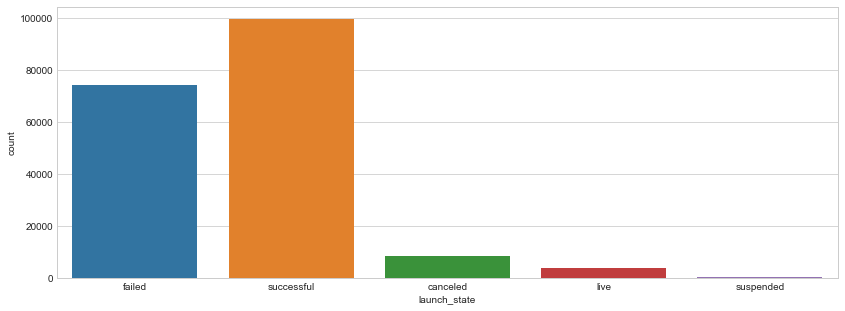

In [388]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [389]:
df['launch_state'].unique()

array(['failed', 'successful', 'canceled', 'live', 'suspended'],
      dtype=object)

Let's delete projects with launch state of canceled, live, or suspended.
* The number of canceled, live, and suspended is far less than failed and successful
* Live projects are not finished and so cannot be used as data to predict success or failure
* It is unknown why projects were canceled or suspended or whether or not they were eventually re-launched or unsuspended.

In [390]:
df.query("launch_state == 'failed' | launch_state == 'successful'", inplace=True)

In [391]:
df.reset_index(drop=True, inplace=True)

In [392]:
df['launch_state'].unique()

array(['failed', 'successful'], dtype=object)

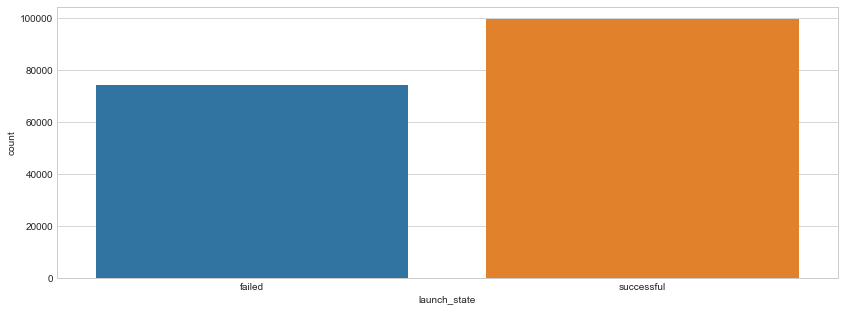

In [393]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [394]:
df['disable_communication'].unique()

array([False])

In [395]:
df['staff_pick'].unique()

array([False,  True])

In [396]:
df['spotlight'].unique()

array([False,  True])

In [397]:
df['creator_registered'].unique()

array([ True])

In [398]:
df.drop(columns=['disable_communication', 'creator_registered'], inplace=True)

In [399]:
df.shape

(173887, 12)

In [400]:
# ---- CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES ----

In [401]:
category = pd.get_dummies(df['category'], drop_first=True)

In [402]:
category.head()

,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [403]:
country = pd.get_dummies(df['country'], drop_first=True)

In [404]:
country.head()

,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MU,MV,MW,MX,MY,MZ,NA,NC,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TJ,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VA,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [405]:
d_launch_state = dict(zip(['failed','successful'], range(0,2)))

In [406]:
d_launch_state

{'failed': 0, 'successful': 1}

In [407]:
launch_state = df['launch_state'].map(d_launch_state)

In [408]:
df[df['launch_state'] == 'successful'].shape[0] - launch_state.sum() # Check mapping

0

In [409]:
# Drop the categorical launch_state column (keep 'category' and 'country' for visualization)

In [410]:
df.drop(['launch_state'],axis=1,inplace=True)

In [411]:
df.head()

,id,category,goal,backers_count,pledged,country,deadline,created_at,launched_at,staff_pick,spotlight
0,895922629,technology,3500.0,1,50.00,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False
1,1190376005,games,225.0,63,1613.47,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True
2,672906219,publishing,6500.0,113,6633.00,US,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True
3,2121203785,fashion,15000.0,1,1.00,GB,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False
4,434454655,fashion,15000.0,99,25338.00,CA,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True


In [412]:
df.columns

Index(['id', 'category', 'goal', 'backers_count', 'pledged', 'country',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight'],
      dtype='object')

In [413]:
# Add the new dummy variable launch_state column and move it to column index 1 and country to column index 3
df = pd.concat([launch_state, df], axis=1)
df = df[['id', 'launch_state', 'category', 'country', 'goal', 'backers_count', 'pledged',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight']]

In [414]:
df.head()

,id,launch_state,category,country,goal,backers_count,pledged,deadline,created_at,launched_at,staff_pick,spotlight
0,895922629,0,technology,US,3500.0,1,50.00,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False
1,1190376005,1,games,US,225.0,63,1613.47,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True
2,672906219,1,publishing,US,6500.0,113,6633.00,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True
3,2121203785,0,fashion,GB,15000.0,1,1.00,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False
4,434454655,1,fashion,CA,15000.0,99,25338.00,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True


In [415]:
# Add the dummy variable country and category variables

In [416]:
df = pd.concat([df, category, country], axis=1)

In [417]:
df.head()

,id,launch_state,category,country,goal,backers_count,pledged,deadline,created_at,launched_at,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MU,MV,MW,MX,MY,MZ,NA,NC,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TJ,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VA,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,895922629,0,technology,US,3500.0,1,50.00,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1190376005,1,games,US,225.0,63,1613.47,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,672906219,1,publishing,US,6500.0,113,6633.00,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2121203785,0,fashion,GB,15000.0,1,1.00,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,434454655,1,fashion,CA,15000.0,99,25338.00,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [418]:
df.isnull().sum().sum() # Check for nulls

0

In [419]:
df.shape

(173887, 220)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173887 entries, 0 to 173886
Columns: 220 entries, id to ZW
dtypes: bool(2), datetime64[ns](3), float64(2), int64(3), object(2), uint8(208)
memory usage: 48.1+ MB


Now we need to consider what exactly some of those columns mean:
* id - still just a primary key
* pledged - somewhat useless except as a comparison to the goal. Drop pledged but add a pledged_ratio column (pledged/goal)
* goal - keep for now but we might drop later due to the potentially high variance with pledged
* deadline - useless except in comparison to launched_at. Drop deadline but add funding_days.
* created_at - useless; launched_at is more applicable.
* launched_at - keep to maybe create some time series plots; move before funding_days
* staff_pick - not exactly sure but convert to 0 (false) and 1 (true)
* spotlight - not exactly sure but covert to 0 (false) and 1 (true)

In [421]:
df.isnull().sum().sum()

0

In [422]:
df.isna().sum().sum()

0

In [426]:
df.columns[0:13]

Index(['id', 'launch_state', 'category', 'country', 'goal', 'backers_count',
       'pledged', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [427]:
pledged_ratio = df['pledged'] / df['goal']

In [428]:
pledged_ratio.head()

0    0.014286
1    7.170978
2    1.020462
3    0.000067
4    1.689200
dtype: float64

In [429]:
df[['pledged', 'goal']].head()

,pledged,goal
0,50.00,3500.0
1,1613.47,225.0
2,6633.00,6500.0
3,1.00,15000.0
4,25338.00,15000.0


In [430]:
df.columns

Index(['id', 'launch_state', 'category', 'country', 'goal', 'backers_count',
       'pledged', 'deadline', 'created_at', 'launched_at',
       ...
       'VE', 'VI', 'VN', 'VU', 'WS', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=220)

In [431]:
df.columns.get_loc("pledged")

6

In [432]:
df.insert(loc=df.columns.get_loc("pledged"), column='pledged_ratio', value=pledged_ratio)

In [433]:
df.shape

(173887, 221)

In [434]:
df.columns

Index(['id', 'launch_state', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'pledged', 'deadline', 'created_at',
       ...
       'VE', 'VI', 'VN', 'VU', 'WS', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=221)

In [435]:
df.drop(columns='pledged', inplace=True)

In [436]:
df.shape

(173887, 220)

In [437]:
df.columns

Index(['id', 'launch_state', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'deadline', 'created_at', 'launched_at',
       ...
       'VE', 'VI', 'VN', 'VU', 'WS', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=220)

In [438]:
df['deadline'][0]

Timestamp('2014-11-28 04:59:00')

In [439]:
df['launched_at'][0]

Timestamp('2014-10-28 19:42:54')

In [440]:
df['deadline'][0] - df['launched_at'][0]

Timedelta('30 days 09:16:06')

In [441]:
(df['deadline'][0] - df['launched_at'][0]).days

30

In [443]:
(df['deadline'] - df['launched_at']).head()

0   30 days 09:16:06
1   16 days 00:00:00
2   30 days 00:00:00
3   59 days 23:00:00
4   35 days 00:00:00
dtype: timedelta64[ns]

In [444]:
(df['deadline'] - df['launched_at']).dt.days.head()

0    30
1    16
2    30
3    59
4    35
dtype: int64

In [445]:
funding_days = (df['deadline'] - df['launched_at']).dt.days

In [446]:
df.insert(loc=df.columns.get_loc("deadline"), column='funding_days', value=funding_days)

In [447]:
df.drop(columns='deadline', inplace=True)

In [448]:
df.shape

(173887, 220)

In [449]:
df.head()

,id,launch_state,category,country,goal,backers_count,pledged_ratio,funding_days,created_at,launched_at,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MU,MV,MW,MX,MY,MZ,NA,NC,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TJ,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VA,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,895922629,0,technology,US,3500.0,1,0.014286,30,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1190376005,1,games,US,225.0,63,7.170978,16,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,672906219,1,publishing,US,6500.0,113,1.020462,30,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2121203785,0,fashion,GB,15000.0,1,0.000067,59,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,434454655,1,fashion,CA,15000.0,99,1.689200,35,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [450]:
df.drop(columns='created_at', inplace=True)

In [451]:
df.head(1)

,id,launch_state,category,country,goal,backers_count,pledged_ratio,funding_days,launched_at,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MU,MV,MW,MX,MY,MZ,NA,NC,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TJ,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VA,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,895922629,0,technology,US,3500.0,1,0.014286,30,2014-10-28 19:42:54,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [452]:
df.columns[0:12]

Index(['id', 'launch_state', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'funding_days', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [453]:
launched_at = df['launched_at']

In [454]:
launched_at

0        2014-10-28 19:42:54
1        2011-10-17 18:39:11
2        2014-08-13 06:12:18
3        2016-03-04 21:04:16
4        2015-03-18 05:01:38
5        2012-12-13 21:31:35
6        2011-03-23 08:03:31
7        2012-05-22 15:26:21
8        2018-04-03 00:05:06
9        2015-03-23 01:51:37
10       2011-03-15 14:29:07
11       2015-07-02 04:00:51
12       2013-08-23 17:28:33
13       2015-12-10 15:27:45
14       2013-08-01 21:20:58
15       2013-08-09 19:07:40
16       2015-09-29 18:47:55
17       2016-04-22 23:04:05
18       2016-06-01 19:01:50
19       2011-05-03 16:57:51
20       2015-01-02 19:04:27
21       2017-10-27 04:23:31
22       2014-10-19 11:45:02
23       2011-06-10 21:55:58
24       2012-09-13 15:30:16
25       2014-02-27 13:01:08
26       2017-05-10 16:54:21
27       2014-02-01 08:03:14
28       2011-12-14 16:50:37
29       2017-10-30 14:00:47
                 ...        
173857   2011-11-06 16:54:09
173858   2017-03-07 22:36:31
173859   2017-12-10 21:44:19
173860   2016-

In [455]:
df.drop(columns='launched_at', inplace=True)

In [456]:
df.insert(loc=2, column='launched_at', value=launched_at)

In [457]:
df.head(1)

,id,launch_state,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MU,MV,MW,MX,MY,MZ,NA,NC,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TJ,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VA,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,895922629,0,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173887 entries, 0 to 173886
Columns: 219 entries, id to ZW
dtypes: bool(2), datetime64[ns](1), float64(2), int64(4), object(2), uint8(208)
memory usage: 46.8+ MB


In [462]:
d_staff_pick = dict(zip([False,True], range(0,2)))
staff_pick = df['staff_pick'].map(d_staff_pick)
df[df['staff_pick'] == True].shape[0] - staff_pick.sum() # check mapping

0

In [463]:
d_spotlight = dict(zip([False,True], range(0,2)))
spotlight = df['spotlight'].map(d_spotlight)
df[df['spotlight'] == True].shape[0] - spotlight.sum() # check mapping

0

In [464]:
df.drop(['staff_pick','spotlight'],axis=1,inplace=True)

In [465]:
df.head(1)

,id,launch_state,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MU,MV,MW,MX,MY,MZ,NA,NC,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TJ,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VA,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,895922629,0,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [466]:
df.insert(loc=df.columns.get_loc("comics"), column='staff_pick', value=staff_pick)

In [467]:
df.insert(loc=df.columns.get_loc("comics"), column='spotlight', value=spotlight)

In [468]:
df.head()

,id,launch_state,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MU,MV,MW,MX,MY,MZ,NA,NC,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TJ,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VA,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,895922629,0,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1190376005,1,2011-10-17 18:39:11,games,US,225.0,63,7.170978,16,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,672906219,1,2014-08-13 06:12:18,publishing,US,6500.0,113,1.020462,30,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2121203785,0,2016-03-04 21:04:16,fashion,GB,15000.0,1,0.000067,59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,434454655,1,2015-03-18 05:01:38,fashion,CA,15000.0,99,1.689200,35,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [469]:
df['staff_pick'].unique()

array([0, 1], dtype=int64)

In [470]:
df['spotlight'].unique()

array([0, 1], dtype=int64)

In [472]:
# Null value check
df.isnull().sum().sum()

0

In [473]:
df.isna().sum().sum()

0

In [480]:
# ========================================
# SAVE CSV
# ========================================
# df.to_csv('data/df01.csv', sep=",")

In [493]:
df.shape

(173887, 219)